# data retrival and basic info

In [1]:
# !pip install biopython
# run in a cell if needed
# !pip install  requests lxml openpyxl
import pandas as pd
import re
from Bio import Entrez, SeqIO
import requests
from collections import Counter , defaultdict
from Bio.SeqUtils import gc_fraction
import matplotlib.pyplot as plt
from Bio.Seq import Seq
import requests


In [8]:
# Set email for NCBI
Entrez.email = "ad3281463@gmail.com"

# retriving MEGF10 Nucleotide Sequence from NCBI (taking the mRNA seq)
def fetch_nucleotide_fasta(gene_id="XM_017009987.2"):
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="fasta", retmode="text")
    record = handle.read()
    with open("MEGF10_nucleotide.fasta", "w") as f: # question: why everytime new file is created? : actuallly it's getting created
        f.write(record)
    print("Nucleotide sequence saved as MEGF10_nucleotide.fasta")
fetch_nucleotide_fasta()

# 1.2 Getting the  Protein Sequence from UniProt (Human MEGF10: Q8TE99)
uniprot_id = "Q96KG7"
url = f"https://www.uniprot.org/uniprot/{uniprot_id}.fasta"

def fetch_protein_fasta(url):
    response = requests.get(url)
    with open("MEGF10_protein.fasta", "w") as f:
        f.write(response.text)
    print("Protein sequence saved as MEGF10_protein.fasta")

fetch_protein_fasta(url)

Nucleotide sequence saved as MEGF10_nucleotide.fasta
Protein sequence saved as MEGF10_protein.fasta


In [9]:


# 1.4 Parse sequences


def parse_fasta(filename):
    record = SeqIO.read(filename, "fasta")
    print(f"ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Length: {len(record.seq)} Base pairs")
    return record
# parse_fasta('C:/Users/ancha/Downloads/BIOINFORMATICS_PR_WEEK2/MEGF10_nucleotide.fasta')

def parse_fasta_protein(filename):
    record = SeqIO.read(filename, "fasta")
    print(f"ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Length: {len(record.seq)} Amino Acids")
    return record
# parse_fasta_protein('C:/Users/ancha/Downloads/BIOINFORMATICS_PR_WEEK2/MEGF10_protein.fasta')


nuc_seq = parse_fasta("MEGF10_nucleotide.fasta")
prot_seq = parse_fasta("MEGF10_protein.fasta")

ID: XM_017009987.2
Description: XM_017009987.2 PREDICTED: Homo sapiens multiple EGF like domains 10 (MEGF10), transcript variant X1, mRNA
Length: 8153 Base pairs
ID: sp|Q96KG7|MEG10_HUMAN
Description: sp|Q96KG7|MEG10_HUMAN Multiple epidermal growth factor-like domains protein 10 OS=Homo sapiens OX=9606 GN=MEGF10 PE=1 SV=1
Length: 1140 Base pairs


In [10]:
#  1.5 Basic Sequence Analysis

# Nucleotide composition
mrna_seq_infor = Counter(nuc_seq.seq)
print("\nNucleotide Composition:")
print(mrna_seq_infor)

# Amino acid composition
aa_comp = Counter(prot_seq.seq)
print("\nAmino Acid Composition:")
print(aa_comp)


Nucleotide Composition:
Counter({'A': 2250, 'T': 2218, 'G': 1932, 'C': 1753})

Amino Acid Composition:
Counter({'C': 148, 'G': 131, 'S': 96, 'P': 75, 'T': 72, 'N': 63, 'L': 56, 'A': 56, 'D': 50, 'R': 47, 'V': 45, 'E': 45, 'H': 44, 'Y': 42, 'Q': 42, 'K': 38, 'I': 37, 'F': 24, 'W': 18, 'M': 11})


# Sequence Composition & Codon Usage Analysis

In [11]:

#  2.1 Global GC Content
gc = gc_fraction(nuc_seq.seq) * 100
print(f"Global GC Content: {gc:.2f}%")


Global GC Content: 45.20%


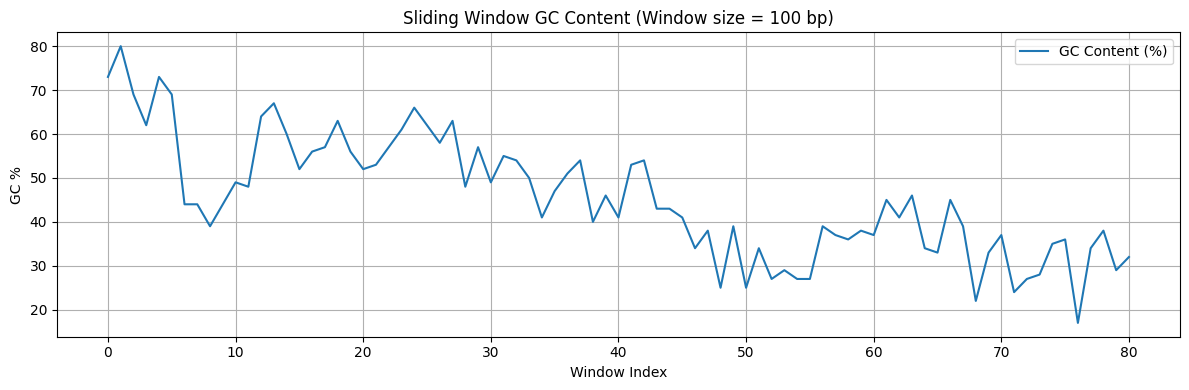

In [12]:
def sliding_gc(seq, window_size=100):
    gc_vals = []
    for i in range(0, len(seq) - window_size + 1, window_size):
        window = seq[i:i+window_size]
        gc_vals.append(gc_fraction(window) * 100)
    return gc_vals

gc_vals = sliding_gc(nuc_seq.seq, window_size=100)

# Plotting
plt.figure(figsize=(12, 4))
plt.plot(gc_vals, label="GC Content (%)")
plt.title("Sliding Window GC Content (Window size = 100 bp)")
plt.xlabel("Window Index")
plt.ylabel("GC %")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
def codon_usage(seq):
    seq = seq.upper()
    codon_freq = defaultdict(int)
    for i in range(0, len(seq) - 2, 3):
        codon = seq[i:i+3]
        if len(codon) == 3:
            codon_freq[codon] += 1
    return codon_freq

codon_freq = codon_usage(str(nuc_seq.seq))
sorted_codons = dict(sorted(codon_freq.items(), key=lambda item: item[1], reverse=True))

# Display top codons
for codon, count in list(sorted_codons.items())[:10]:
    print(f"{codon}: {count}", end=", ")


CTG: 107, TGG: 90, AAA: 86, TGA: 79, TTG: 66, ATG: 65, GAA: 62, TTT: 62, AAT: 62, CAC: 61, 

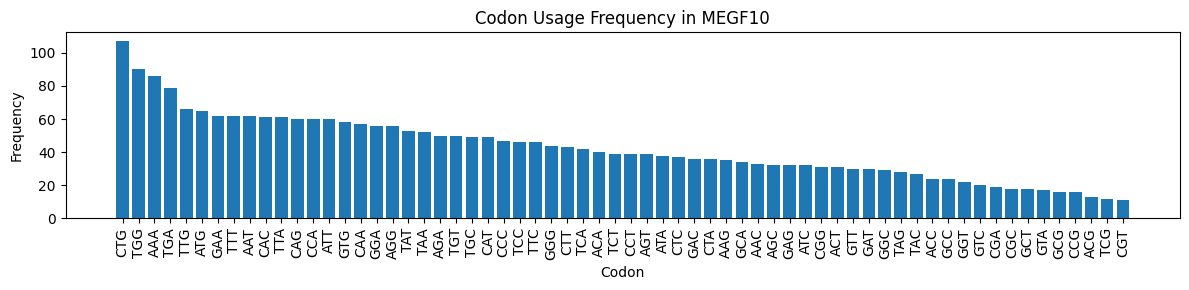

In [16]:
plt.figure(figsize=(12, 3))
plt.bar(sorted_codons.keys(), sorted_codons.values())
plt.title("Codon Usage Frequency in MEGF10")
plt.xlabel("Codon")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Functional Domain Annotation & Motif Prediction (Protein Level)

In [ ]:
# 3.1 Retrieve UniProt Protein Info (Manual or Programmatic) here we are using programmatic way

uniprot_id = "Q96KG7"
url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.txt"

response = requests.get(url)
with open("MEGF10_uniprot.txt", "w") as f:
    f.write(response.text)

print("UniProt entry saved.")


UniProt entry saved.


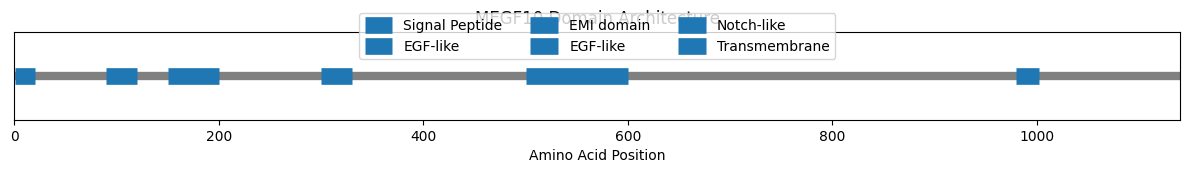

In [19]:
# parse for Domain Info (Using Regex)
import matplotlib.pyplot as plt

# Define some sample domains for MEGF10 (positions approximate)
domains = [
    ("Signal Peptide", 1, 20),
    ("EGF-like", 90, 120),
    ("EMI domain", 150, 200),
    ("EGF-like", 300, 330),
    ("Notch-like", 500, 600),
    ("Transmembrane", 980, 1002)
]

protein_length = 1140

# Plot domain architecture
plt.figure(figsize=(12, 2))
plt.hlines(1, 0, protein_length, color='gray', linewidth=6)

for name, start, end in domains:
    plt.hlines(1, start, end, linewidth=12, label=name)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3)
plt.title("MEGF10 Domain Architecture")
plt.xlabel("Amino Acid Position")
plt.yticks([])
plt.xlim(0, protein_length)
plt.tight_layout()
plt.show()


In [21]:
# Load the file
file_path = "C:/Users/ancha/Downloads/BIOINFORMATICS_PR_WEEK2/Seq_data/Prosite_results.txt"
with open(file_path, "r") as f:
    lines = f.readlines()

# Prepare storage
results = []
current_prosite_id = None

for i, line in enumerate(lines):
    # Detect a PROSITE accession (e.g., PS51041)
    match_id = re.match(r"\s*(PS\d{5})", line)
    if match_id:
        current_prosite_id = match_id.group(1)
        continue
    
    # Detect position lines (e.g., "30 - 107       score=27.456")
    match_pos = re.match(r"\s*(\d+)\s*-\s*(\d+).*score=([\d\.]+)", line)
    if match_pos and current_prosite_id:
        start = int(match_pos.group(1))
        end = int(match_pos.group(2))
        score = float(match_pos.group(3))
        
        # Optional: capture the following sequence snippet line
        snippet_line = lines[i+1].strip() if (i+1) < len(lines) else ""
        
        results.append({
            "PROSITE_ID": current_prosite_id,
            "Start": start,
            "End": end,
            "Score": score,
            "Sequence_Snippet": snippet_line
        })

# Create DataFrame
df_prosite = pd.DataFrame(results)
df_prosite
# Save and display
# df_prosite.to_csv("megf10_prosite_summary.csv", index=False)
# df_prosite


PROSITE_ID  Start  End   Score  \
0     PS51041     30  107  27.456   
1     PS50026    106  136   6.557   
2     PS50026    144  179   8.763   
3     PS50026    187  222  12.946   
4     PS50026    230  265  10.943   
5     PS50026    278  308  12.600   
6     PS50026    316  351   9.480   
7     PS50026    405  440   8.031   
8     PS50026    453  483   7.553   
9     PS50026    491  526   9.765   
10    PS50026    539  569   7.293   
11    PS50026    577  612  10.381   
12    PS50026    665  700   8.474   
13    PS50026    713  743   8.629   
14    PS50026    751  786   9.891   
15    PS50026    799  829   7.924   

                                     Sequence_Snippet  
0   DPNVCSHWESYSVT---VQESYPHPFDQIYYTSCT---DILNWFKC...  
1              -VPHCADKCVH-GRCIAPNT-----CQCEPGWGGTNCS  
2            WGPHCTsrCQCKNGALCNPITG----ACHCAAGFRGWRCE  
3            YGNDCHqrCQCQNGATCDHVTG----ECRCPPGYTGAFCE  
4            HGPQCEqrCPCQNGGVCHHVTG----ECSCPSGWMGTVCG  
5              -SQECQ--CHNGGTCDAATG----QCHCSPGYTGERCQ  
6            YGVLCAetCQCVNGGKCYHVSG----ACLCEAGFAGERCE  
7            YGEACQqiCSCQNGADCDSVTG----KCTCAPGFKGIDCS  
8              -SSRCG--CKNDAVCSPVDG----SCTCKAGWHGVDCS  
9            WGFGCNltCQCLNGGACNTLDG----TCTCAPGWRGEKCE  
10             -AERCD--CSHADGCHPTTG----HCRCLPGWSGVHCD  
11           WGPNCSlpCYCKNGASCSPDDG----ICECAPGFRGTTCQ  
12           FGKNCAgiCTCTNNGTCNPIDR----SCQCYPGWIGSDCS  
13             -IHTCN--CHNGAFCSAYDG----ECKCTPGWTGLYCT  
14           YGKDCAliCQCQNGADCDHISG----QCTCRTGFMGRHCE  
15             -RQICD--CLNNSTCDHITG----TCYCSPGWKGARCD

# clinical variation comparision for mutation mapping

In [22]:
# manually downloaded the clinical variation of mefg10 form ncbi clinvar : filters--> missense , nonsense , and more

# Load your downloaded ClinVar table
df_variants = pd.read_csv("C:/Users/ancha/Downloads/BIOINFORMATICS_PR_WEEK2/Seq_data/clinvar_result.txt", sep="\t")

print(df_variants.columns)  # check column names
df_variants.head()


Index(['Name', 'Gene(s)', 'Protein change', 'Condition(s)', 'Accession',
       'GRCh37Chromosome', 'GRCh37Location', 'GRCh38Chromosome',
       'GRCh38Location', 'VariationID', 'AlleleID(s)', 'dbSNP ID',
       'Canonical SPDI', 'Variant type', 'Molecular consequence',
       'Germline classification', 'Germline date last evaluated',
       'Germline review status', 'Somatic clinical impact',
       'Somatic clinical impact date last evaluated',
       'Somatic clinical impact review status', 'Oncogenicity classification',
       'Oncogenicity date last evaluated', 'Oncogenicity review status',
       'Unnamed: 24'],
      dtype='object')


Name Gene(s) Protein change  \
0  NM_001256545.2(MEGF10):c.3350G>A (p.Arg1117Gln)  MEGF10         R1117Q   
1     NM_001256545.2(MEGF10):c.154T>C (p.Phe52Leu)  MEGF10           F52L   
2   NM_001256545.2(MEGF10):c.1364G>T (p.Arg455Leu)  MEGF10          R455L   
3   NM_001256545.2(MEGF10):c.1556G>C (p.Gly519Ala)  MEGF10          G519A   
4   NM_001256545.2(MEGF10):c.1547G>T (p.Cys516Phe)  MEGF10          C516F   

              Condition(s)     Accession  GRCh37Chromosome GRCh37Location  \
0             not provided  VCV004071761                 5      126792937   
1  Inborn genetic diseases  VCV004053625                 5      126674849   
2  Inborn genetic diseases  VCV004053623                 5      126754870   
3  Inborn genetic diseases  VCV004053622                 5      126755865   
4  Inborn genetic diseases  VCV004053621                 5      126755856   

   GRCh38Chromosome GRCh38Location  VariationID  ...  Germline classification  \
0                 5      127457245      4071761  ...   Uncertain significance   
1                 5      127339157      4053625  ...   Uncertain significance   
2                 5      127419178      4053623  ...            Likely benign   
3                 5      127420173      4053622  ...   Uncertain significance   
4                 5      127420164      4053621  ...   Uncertain significance   

  Germline date last evaluated               Germline review status  \
0                 Jan 25, 2025  criteria provided, single submitter   
1                 Jun 11, 2025  criteria provided, single submitter   
2                 Apr 29, 2025  criteria provided, single submitter   
3                 Mar 16, 2025  criteria provided, single submitter   
4                 Mar 16, 2025  criteria provided, single submitter   

  Somatic clinical impact Somatic clinical impact date last evaluated  \
0                     NaN                                         NaN   
1                     NaN                                         NaN   
2                     NaN                                         NaN   
3                     NaN                                         NaN   
4                     NaN                                         NaN   

  Somatic clinical impact review status Oncogenicity classification  \
0                                   NaN                         NaN   
1                                   NaN                         NaN   
2                                   NaN                         NaN   
3                                   NaN                         NaN   
4                                   NaN                         NaN   

  Oncogenicity date last evaluated Oncogenicity review status  Unnamed: 24  
0                              NaN                        NaN          NaN  
1                              NaN                        NaN          NaN  
2                              NaN                        NaN          NaN  
3                              NaN                        NaN          NaN  
4                              NaN                        NaN          NaN  

[5 rows x 25 columns]

In [23]:
# Assuming the column name is 'Gene (Protein Change)'
colname = "Protein change"  # column where the changes are stored acutally

# Extract the numeric position (e.g., 455 from R455L)
df_variants["Protein_Position"] = df_variants[colname].str.extract(r"(\d+)").astype("Int64")

print(df_variants[["Protein change", "Protein_Position"]].head())


  Protein change  Protein_Position
0         R1117Q              1117
1           F52L                52
2          R455L               455
3          G519A               519
4          C516F               516


Mutation Mapping


In [24]:
df_prosite = pd.read_csv("C:/Users/ancha/Downloads/BIOINFORMATICS_PR_WEEK2/Files/megf10_prosite_summary.csv")
# Optional: check structure
print(df_prosite.head())


  PROSITE_ID  Start  End   Score  \
0    PS51041     30  107  27.456   
1    PS50026    106  136   6.557   
2    PS50026    144  179   8.763   
3    PS50026    187  222  12.946   
4    PS50026    230  265  10.943   

                                    Sequence_Snippet  
0  DPNVCSHWESYSVT---VQESYPHPFDQIYYTSCT---DILNWFKC...  
1                                             #NAME?  
2           WGPHCTsrCQCKNGALCNPITG----ACHCAAGFRGWRCE  
3           YGNDCHqrCQCQNGATCDHVTG----ECRCPPGYTGAFCE  
4           HGPQCEqrCPCQNGGVCHHVTG----ECSCPSGWMGTVCG  


In [25]:
# Mapping variants to domains
def map_to_domain(pos, domain_df):
    if pd.isna(pos):
        return None
    for _, row in domain_df.iterrows():
        if row["Start"] <= pos <= row["End"]:
            return row["PROSITE_ID"]
    return "Outside domains"

df_variants["Domain"] = df_variants["Protein_Position"].apply(lambda x: map_to_domain(x, df_prosite))


In [26]:
# Merge both tables
df_merged = df_variants.merge(
    df_prosite,
    left_on="Domain",
    right_on="PROSITE_ID",
    how="left"
)

# Now you have ClinVar mutation data + PROSITE info in one table
df_merged.to_csv("megf10_variants_with_domains.csv", index=False)


C:\Users\ancha\AppData\Local\Temp\ipykernel_20996\1537976570.py:77: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


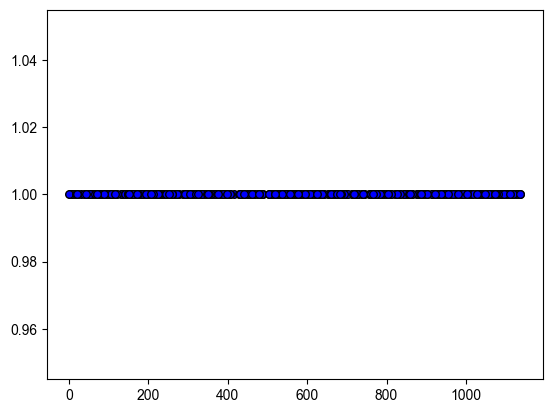

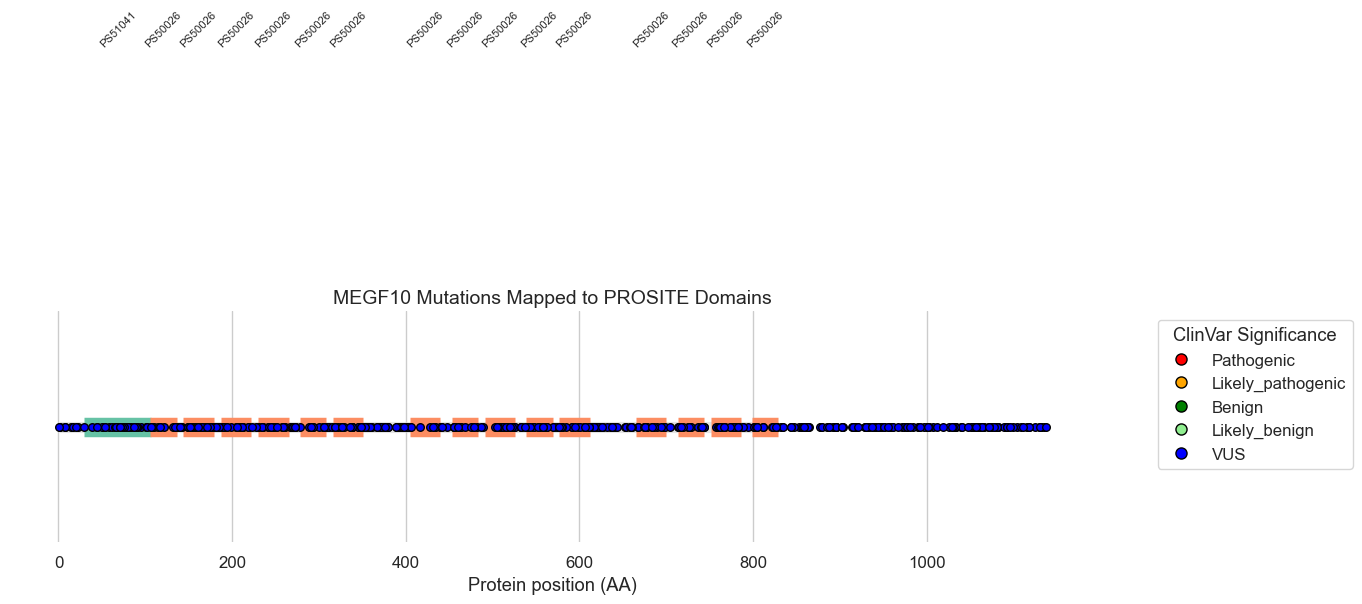

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Color map for clinical significance
sig_colors = {
    "Pathogenic": "red",
    "Likely_pathogenic": "orange",
    "Benign": "green",
    "Likely_benign": "lightgreen",
    "VUS": "blue"
}
# Keep only rows with valid numeric positions
df_variants_clean = df_variants.dropna(subset=["Protein_Position"])

# Then plot using df_variants_clean instead of df_variants
for _, mut in df_variants_clean.iterrows():
    plt.scatter(
        mut["Protein_Position"], 
        1, 
        color= sig_colors.get(mut.get("ClinicalSignificance", "VUS"), "grey"), 
        edgecolor="black", 
        zorder=3, 
        s=30
    )
# Remove NaN positions
# df_variants_clean = df_variants.dropna(subset=["Protein_Position"])

# Style
sns.set(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(14, 3))

# Protein length from PROSITE data
protein_length = df_prosite["End"].max()

# Draw protein backbone
plt.hlines(1, 1, protein_length, colors="lightgrey", lw=8, alpha=0.6)

# Draw PROSITE domains as colored bars
domain_palette = sns.color_palette("Set2", n_colors=len(df_prosite["PROSITE_ID"].unique()))
domain_colors = dict(zip(df_prosite["PROSITE_ID"].unique(), domain_palette))

for i, row in df_prosite.iterrows():
    # Draw thicker domain bars
    plt.hlines(1, row["Start"], row["End"], 
               colors=domain_colors[row["PROSITE_ID"]], lw=14)
    # Offset labels to avoid overlap
    plt.text((row["Start"] + row["End"]) / 2, 1.18, row["PROSITE_ID"],
             ha="center", va="bottom", fontsize=8, rotation=45)

# Draw mutations
for _, mut in df_variants_clean.iterrows():
    plt.scatter(
        mut["Protein_Position"], 
        1, 
        color=sig_colors.get(mut.get("ClinicalSignificance", "VUS"), "grey"), 
        edgecolor="black", 
        zorder=3, 
        s=30
    )

# Labels and legend
plt.xlabel("Protein position (AA)")
plt.yticks([])
plt.title("MEGF10 Mutations Mapped to PROSITE Domains", fontsize=14)

# Legend for clinical significance
handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=c, markersize=8, 
               label=k, markeredgecolor="black")
    for k, c in sig_colors.items()
]
plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), 
           loc='upper left', title="ClinVar Significance")

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()
